### 1. Importing **modules**

In [1]:
import pandas as pd
import seaborn as sns
import textwrap
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

### 2. Loading **data**

In [2]:
file = "../input/better-life-indexcsv/BLI_18052021173439395.csv"
df = pd.read_csv(file)
df[df.Country == "Australia"].head(7)

,Unnamed: 0,Unnamed: 0.1,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,0,0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
33,34,34,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,5.90,NaN,NaN
64,66,66,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,5.00,NaN,NaN
95,98,98,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,HGH,High,PC,Percentage,0,Units,NaN,NaN,2.29,NaN,NaN
126,130,130,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,LW,Low,PC,Percentage,0,Units,NaN,NaN,11.02,NaN,NaN
192,198,235,AUS,Australia,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,20.00,NaN,NaN
228,235,272,AUS,Australia,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,63.50,NaN,NaN


### 3. Loading the **description** for each of the **indicators**

In [3]:
f = open("../input/indicators-description-bmitxt/description_bmi.txt").read()
descr = [x for x in f.split(sep="#")]

### 4. Data preparation

In [4]:
# Taking only 'Total' value from 'Inequality' column
df = df[df.Inequality == "Total"]

# Taking only needed columns
df = df[["Country", "Indicator", "Unit", "Value"]]
df

,Country,Indicator,Unit,Value
0,Australia,Labour market insecurity,Percentage,5.40
1,Austria,Labour market insecurity,Percentage,3.50
2,Belgium,Labour market insecurity,Percentage,3.70
3,Canada,Labour market insecurity,Percentage,6.00
4,Czech Republic,Labour market insecurity,Percentage,3.10
...,...,...,...,...
2211,Lithuania,Life satisfaction,Average score,5.90
2218,Colombia,Homicide rate,Ratio,24.50
2219,Lithuania,Homicide rate,Ratio,3.40
2224,Colombia,Employees working very long hours,Percentage,26.56


In [5]:
df.shape

(812, 4)

In [6]:
df[["Indicator", "Unit"]]

,Indicator,Unit
0,Labour market insecurity,Percentage
1,Labour market insecurity,Percentage
2,Labour market insecurity,Percentage
3,Labour market insecurity,Percentage
4,Labour market insecurity,Percentage
...,...,...
2211,Life satisfaction,Average score
2218,Homicide rate,Ratio
2219,Homicide rate,Ratio
2224,Employees working very long hours,Percentage


In [7]:
# Taking only unique values from 'Indicator' column
newdf = df[["Indicator", "Unit"]].drop_duplicates(subset="Indicator").reset_index(drop=True)
print("Indicators:")
for n, ind in enumerate(newdf.Indicator.unique()):
    print(f"{n+1}. {ind}")

Indicators:
1. Labour market insecurity
2. Dwellings without basic facilities
3. Housing expenditure
4. Feeling safe walking alone at night
5. Household net adjusted disposable income
6. Household net wealth
7. Employment rate
8. Long-term unemployment rate
9. Personal earnings
10. Quality of support network
11. Educational attainment
12. Student skills
13. Years in education
14. Air pollution
15. Water quality
16. Voter turnout
17. Life expectancy
18. Self-reported health
19. Life satisfaction
20. Homicide rate
21. Employees working very long hours
22. Time devoted to leisure and personal care


In [8]:
final_list = []

for n, i in enumerate(df.Indicator.unique()):
    temp_df = df[df.Indicator == i]
    unit = temp_df.Unit.unique()[0]
    temp_df = temp_df[["Country", "Value"]].sort_values(by="Value", ascending=False)
    
    # Creating final list for every 'Indicator'
    final_list.append([i, unit, temp_df, descr[n]])
    # i - current indicator
    # unit - current unit
    # temp_df - temporary dataframe
    # descr[n] - description for current indicator    

In [9]:
final_list[4]

['Household net adjusted disposable income',
 'US Dollar',
               Country    Value
 366     United States  45284.0
 356        Luxembourg  39264.0
 364       Switzerland  37466.0
 358            Norway  35725.0
 350           Germany  34294.0
 343           Austria  33541.0
 342         Australia  32759.0
 349            France  31304.0
 363            Sweden  31287.0
 345            Canada  30854.0
 344           Belgium  30364.0
 348           Finland  29943.0
 354             Japan  29798.0
 347           Denmark  29606.0
 357       Netherlands  29333.0
 365    United Kingdom  28715.0
 353             Italy  26588.0
 352           Ireland  25310.0
 362             Spain  23999.0
 355             Korea  21882.0
 2145        Lithuania  21660.0
 346    Czech Republic  21453.0
 360          Portugal  21203.0
 369          Slovenia  20820.0
 361   Slovak Republic  20474.0
 359            Poland  19814.0
 367           Estonia  19697.0
 351            Greece  17700.0
 368         

### 5. Drawing **barplots**

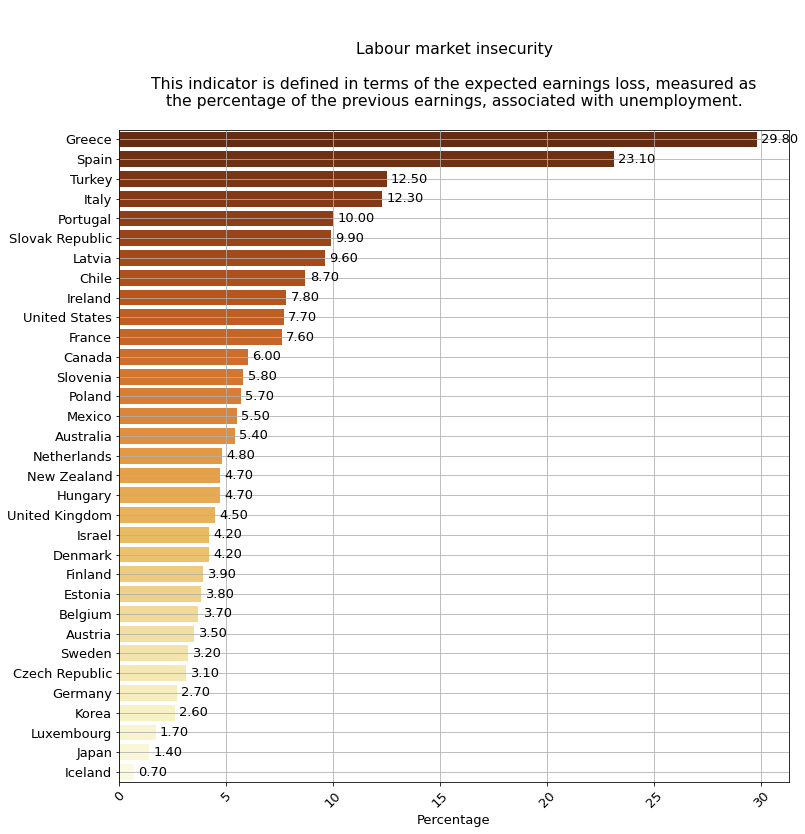

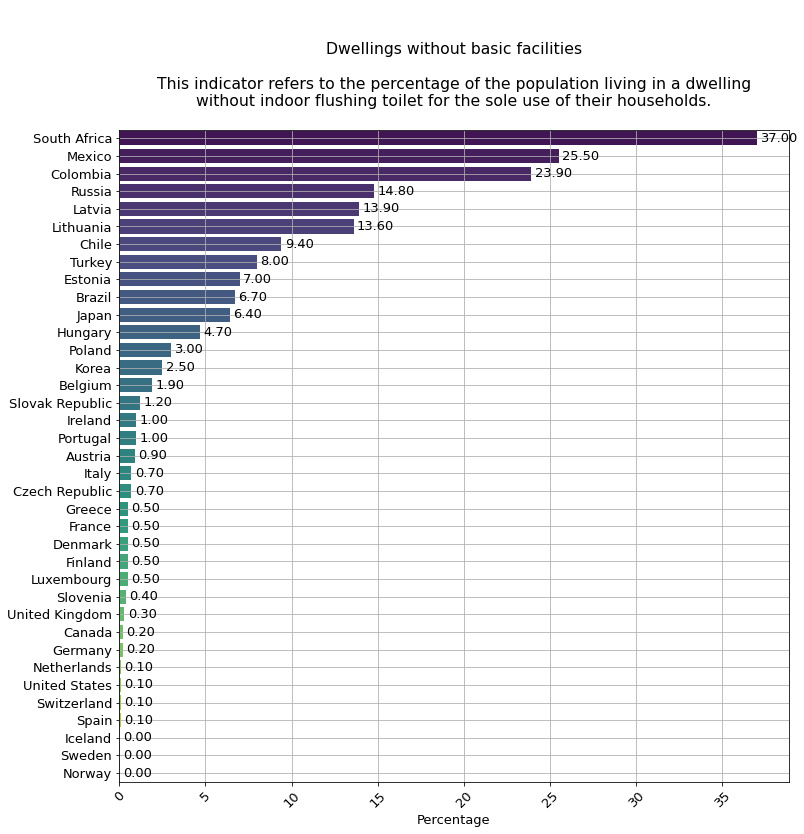

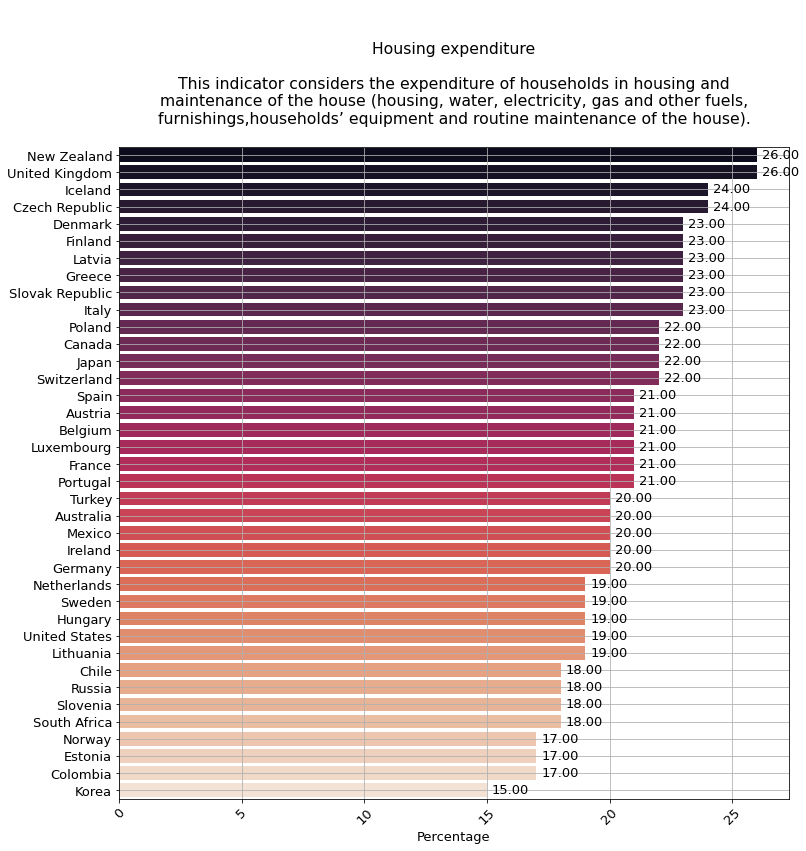

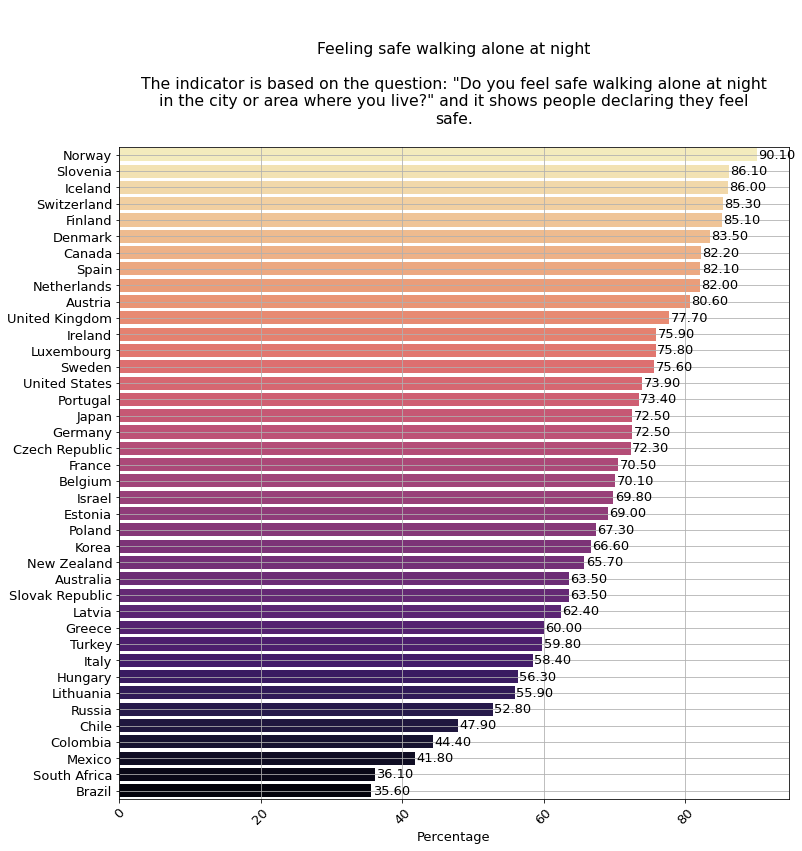

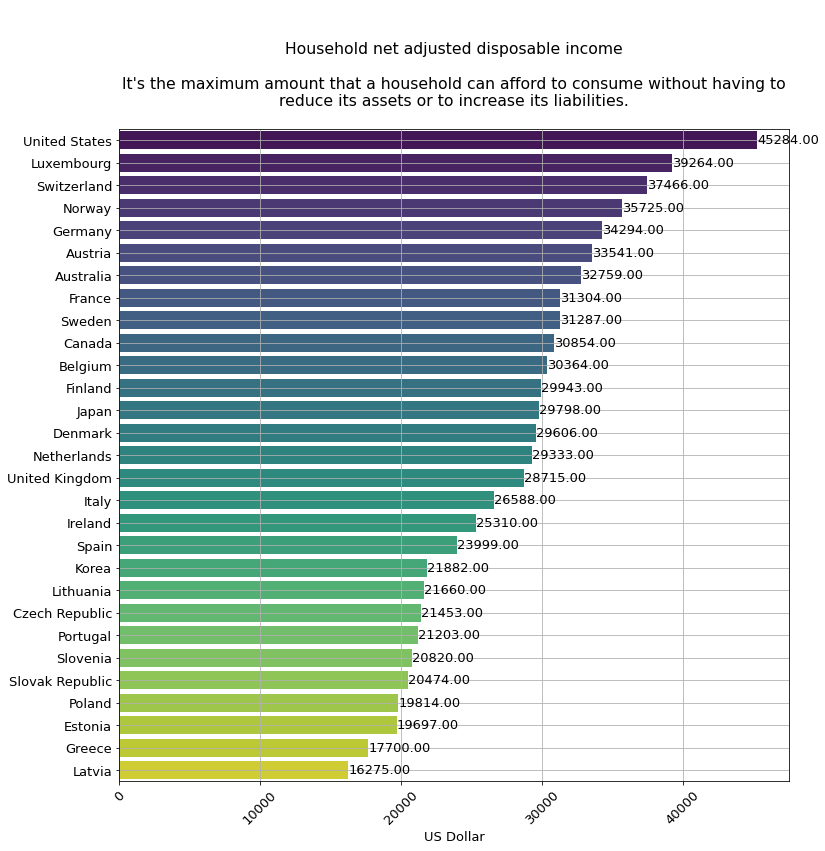

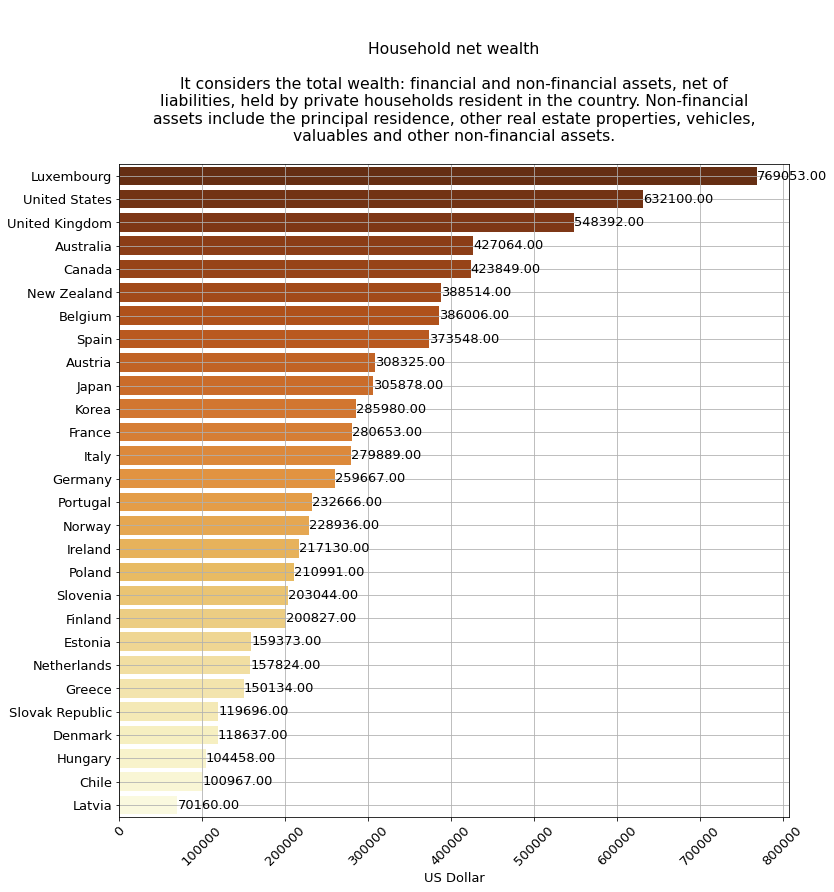

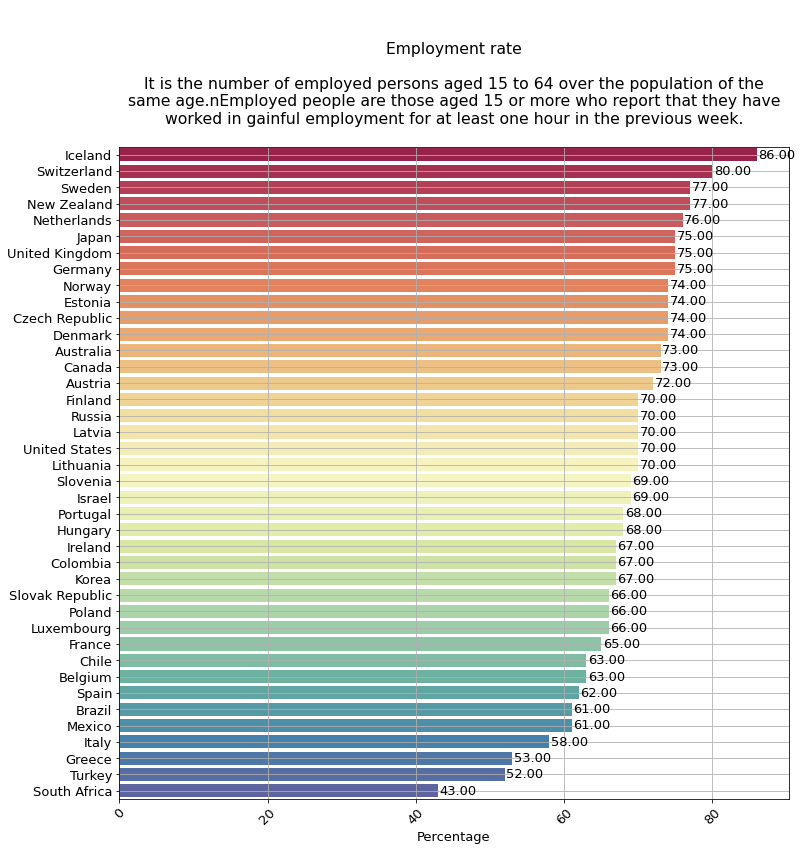

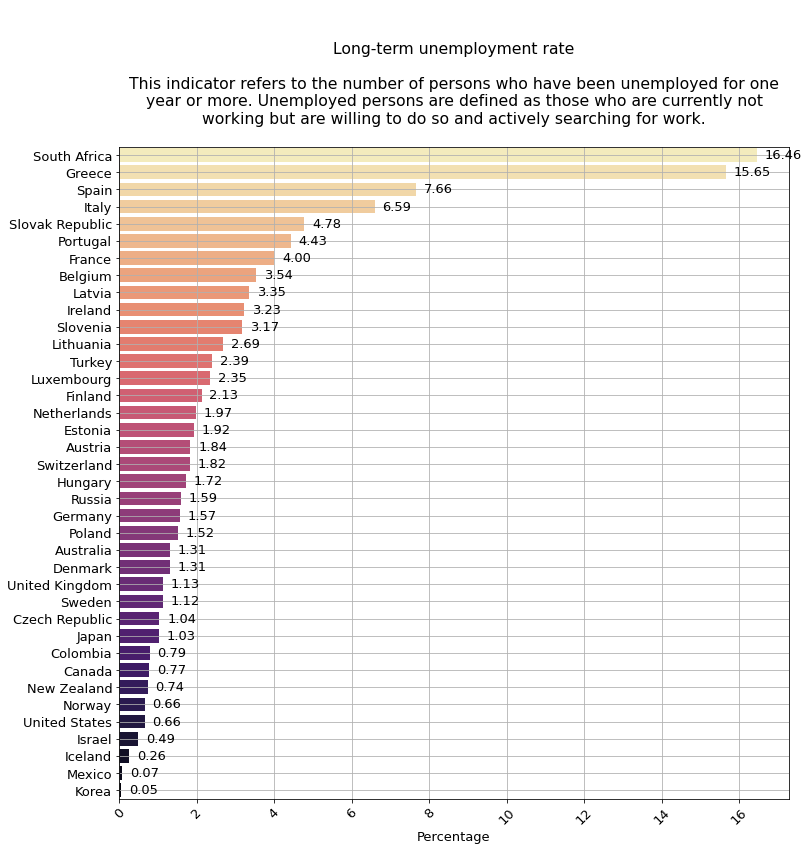

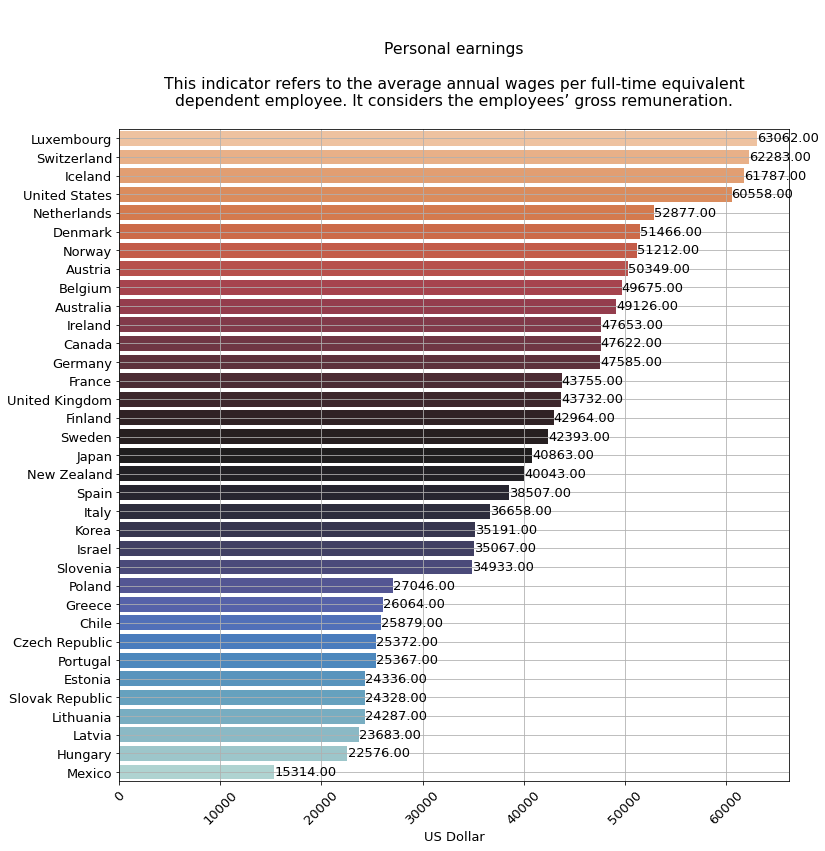

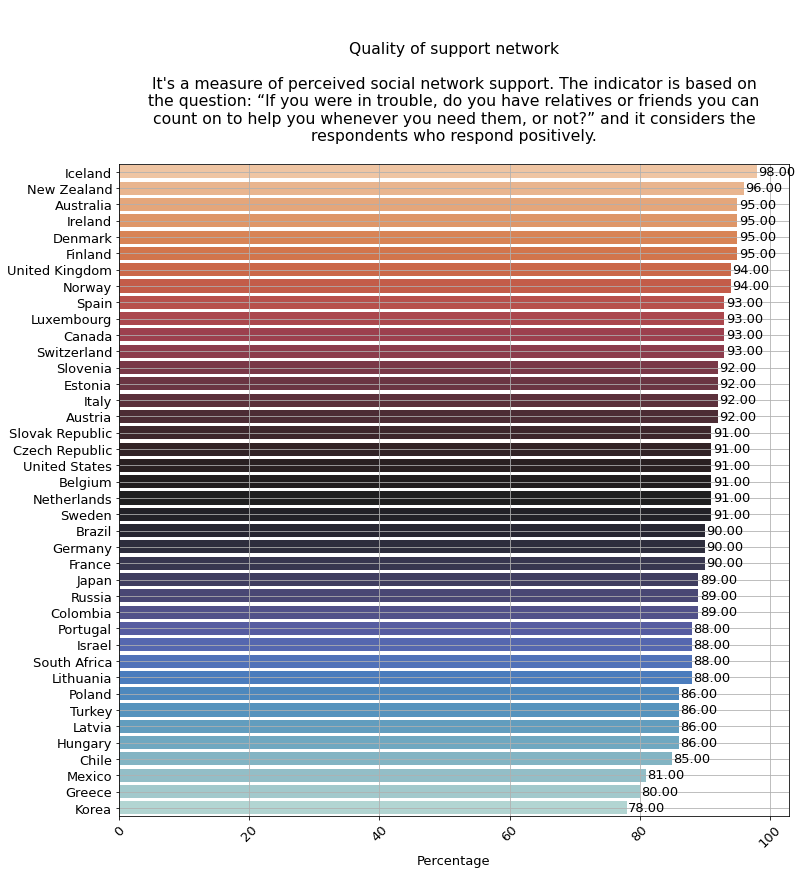

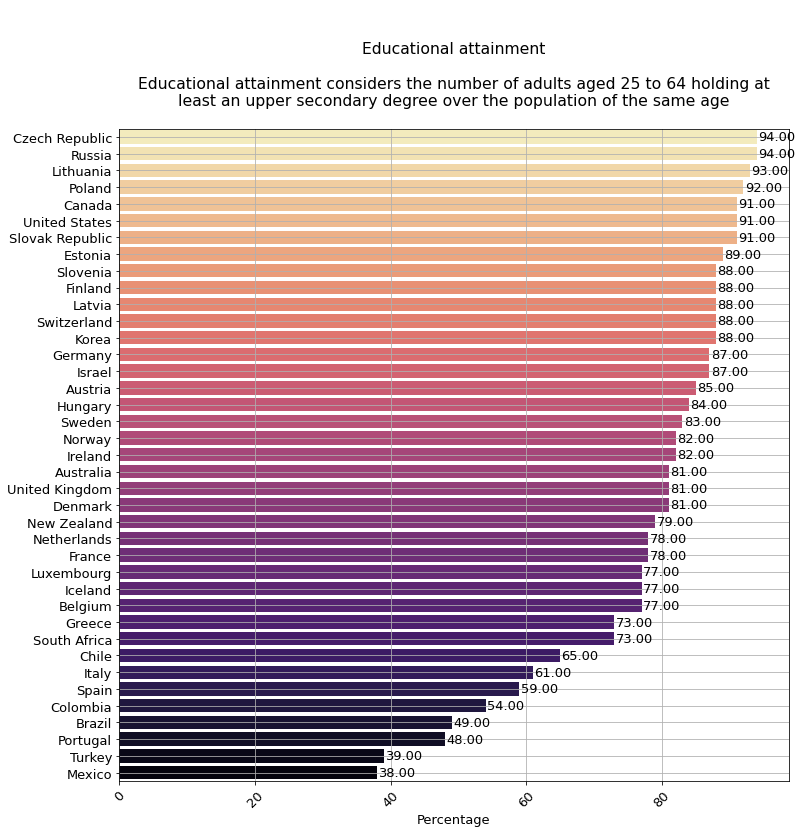

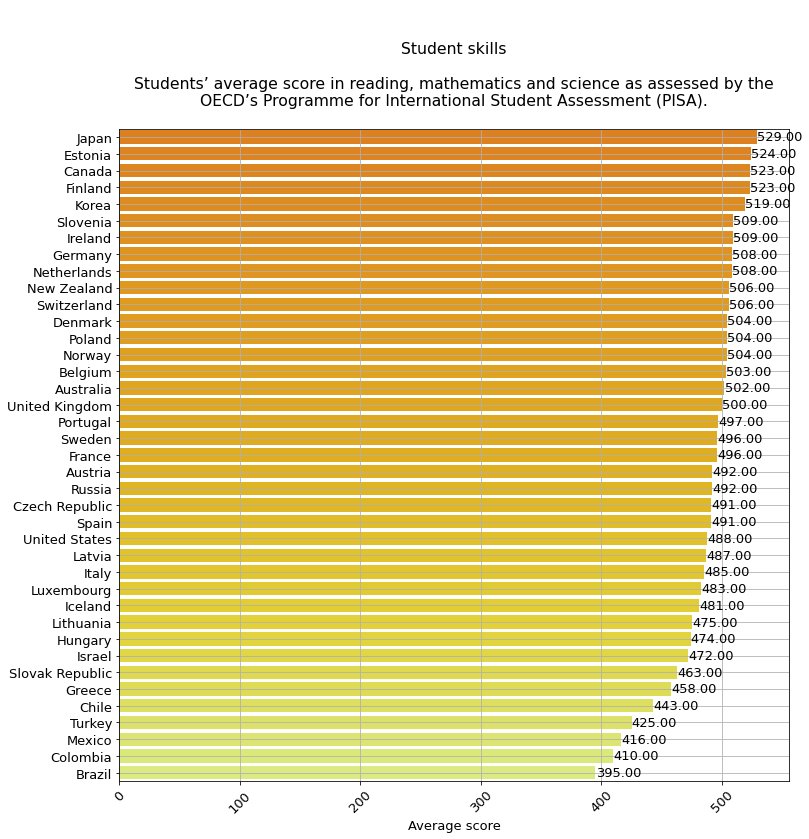

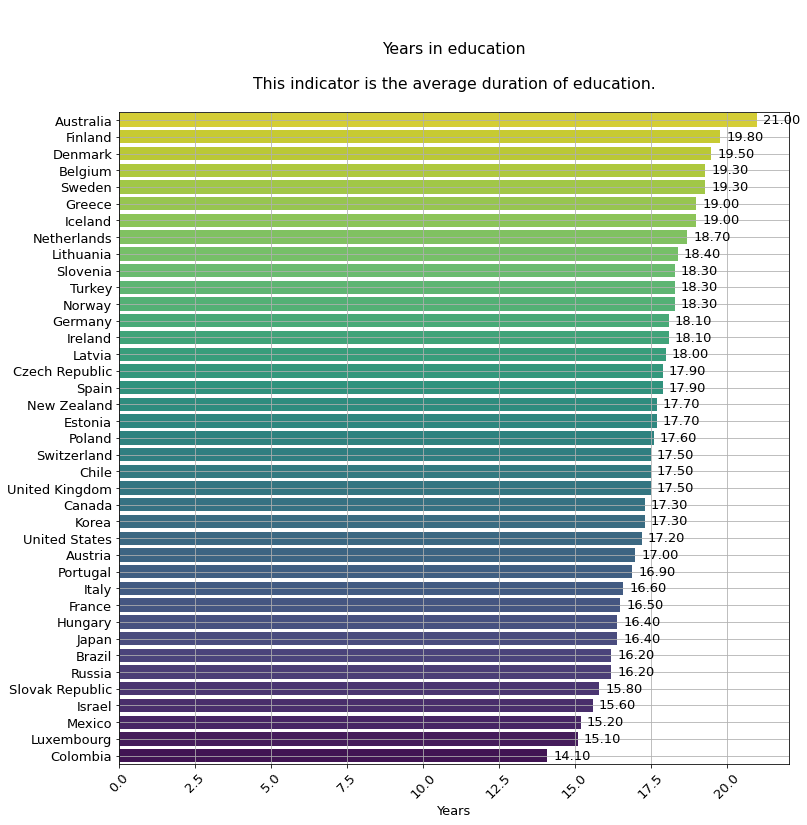

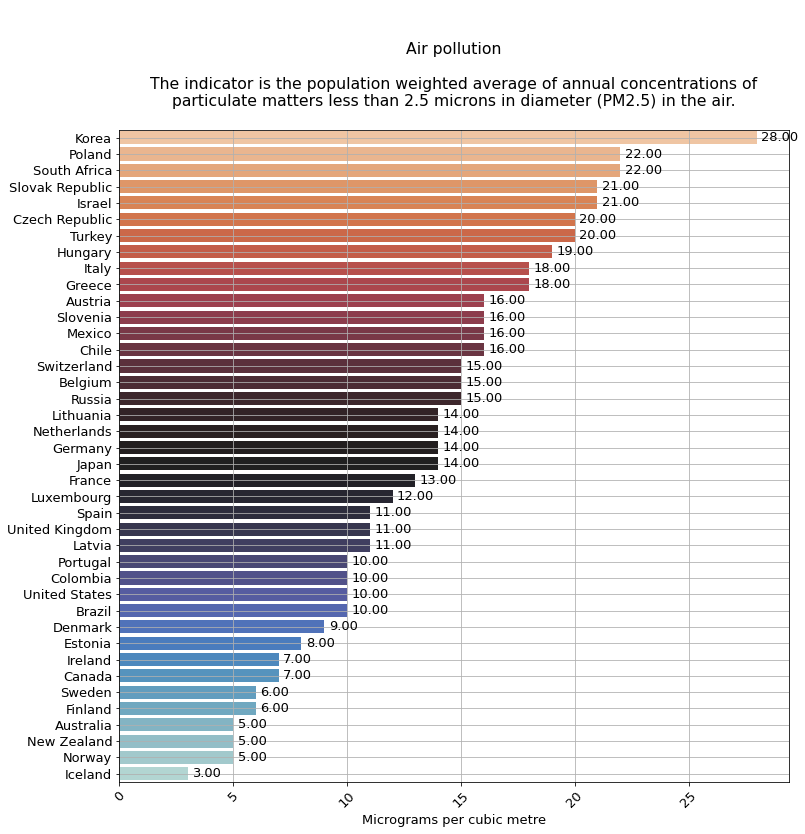

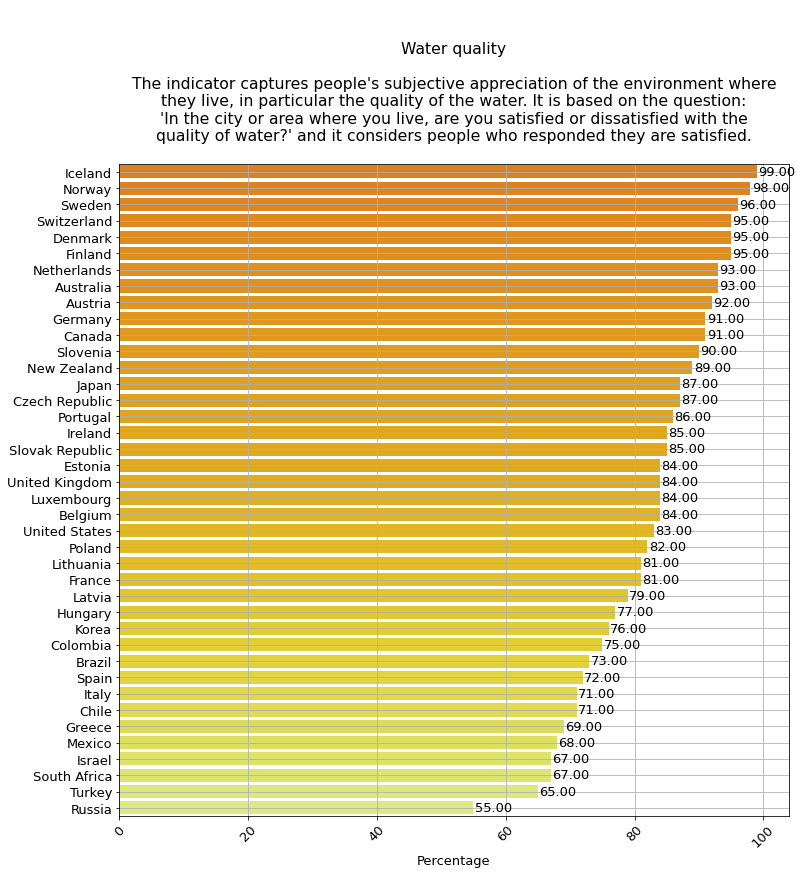

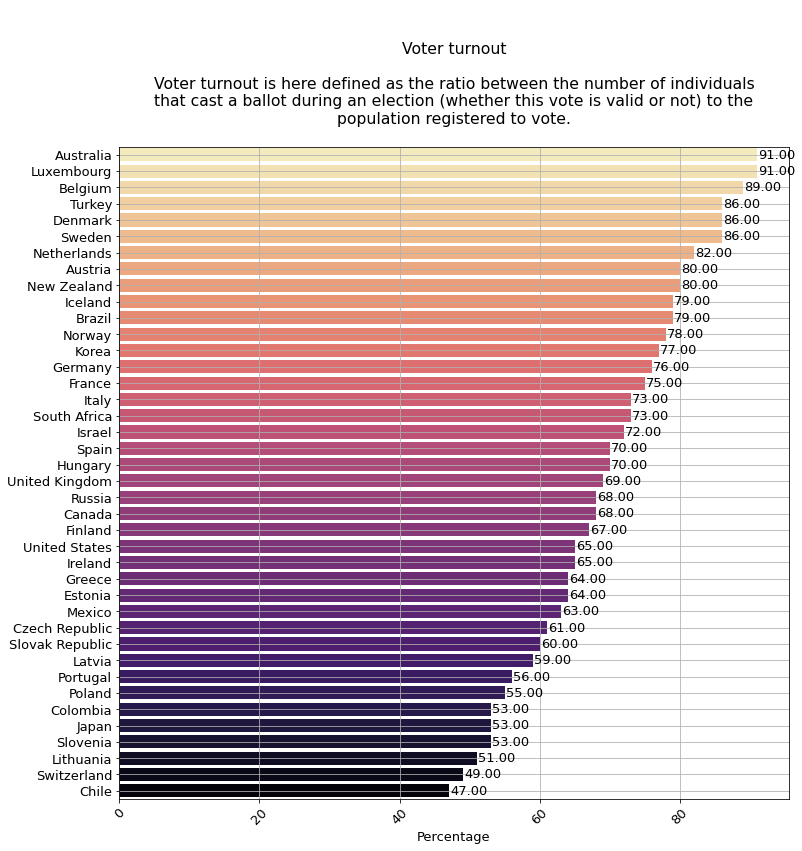

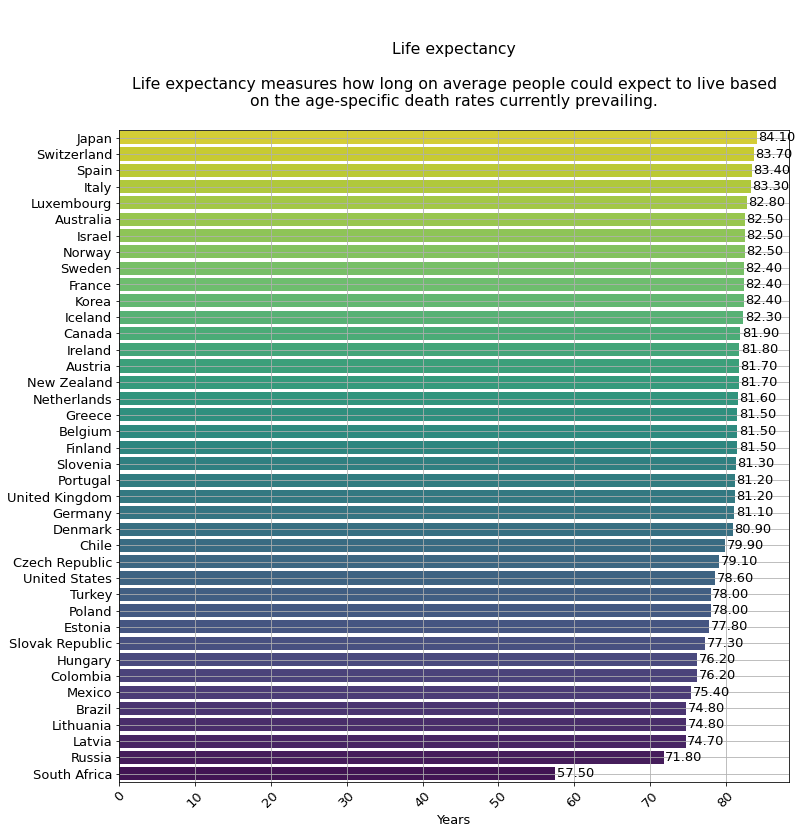

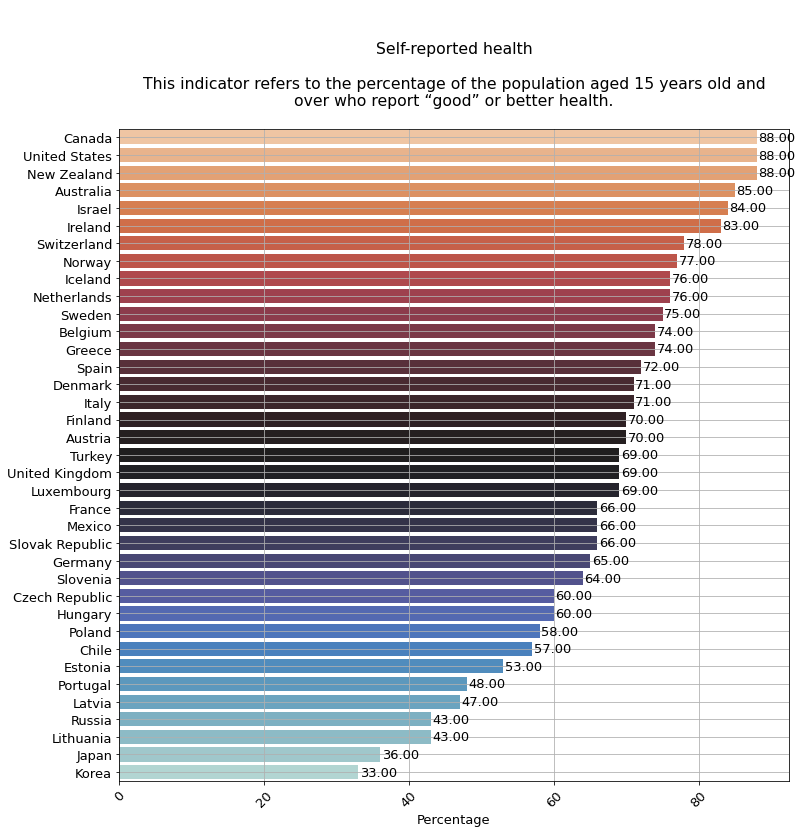

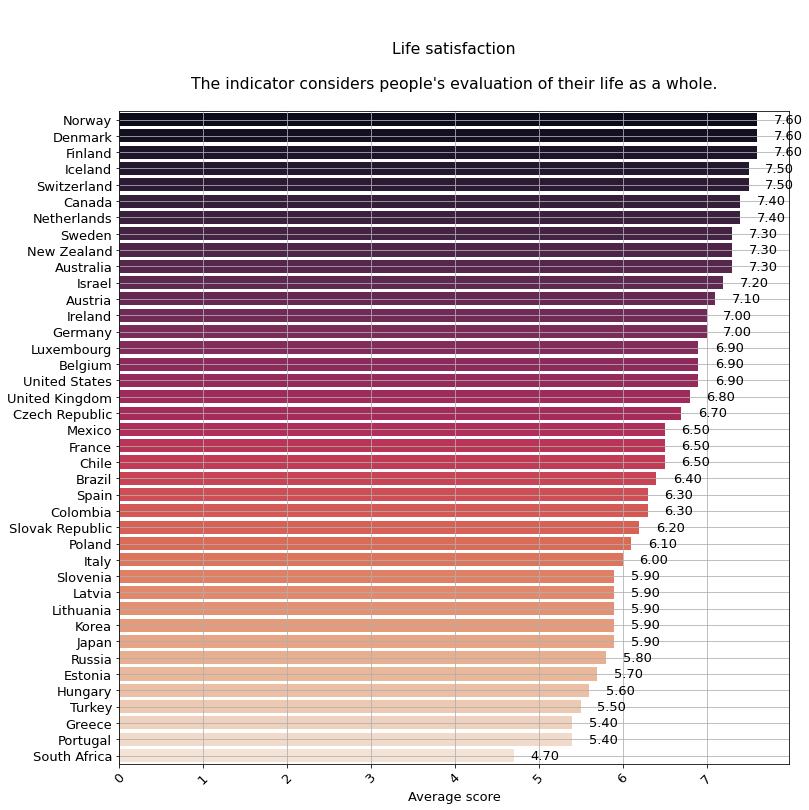

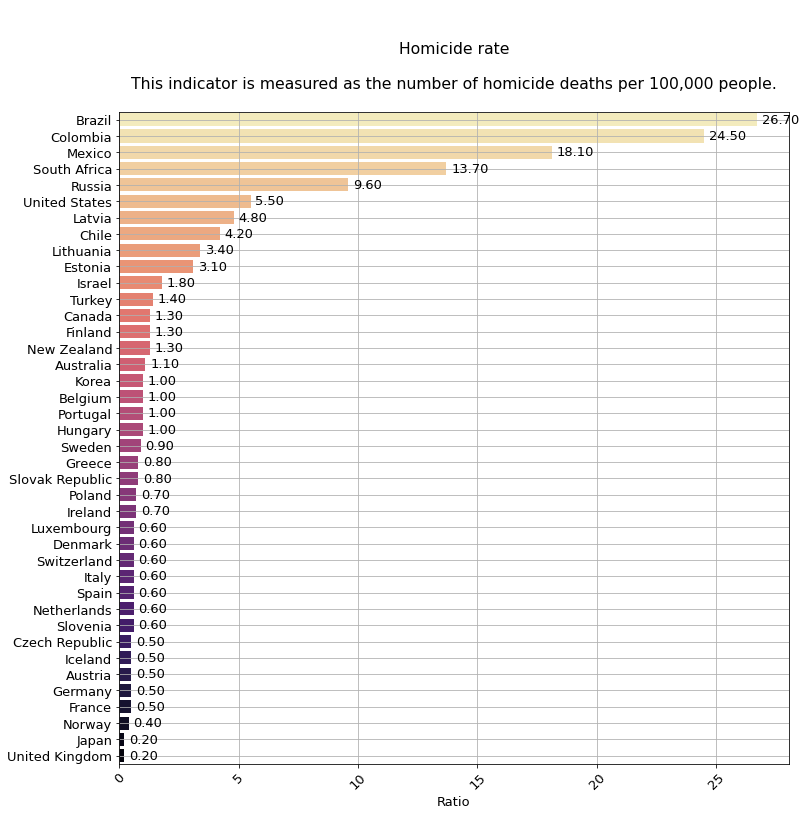

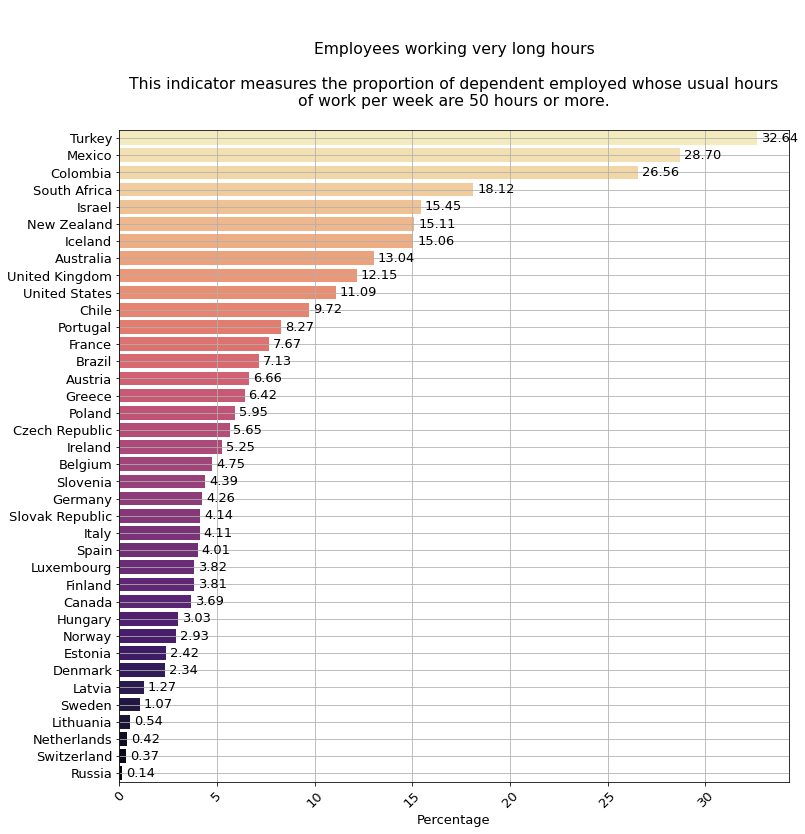

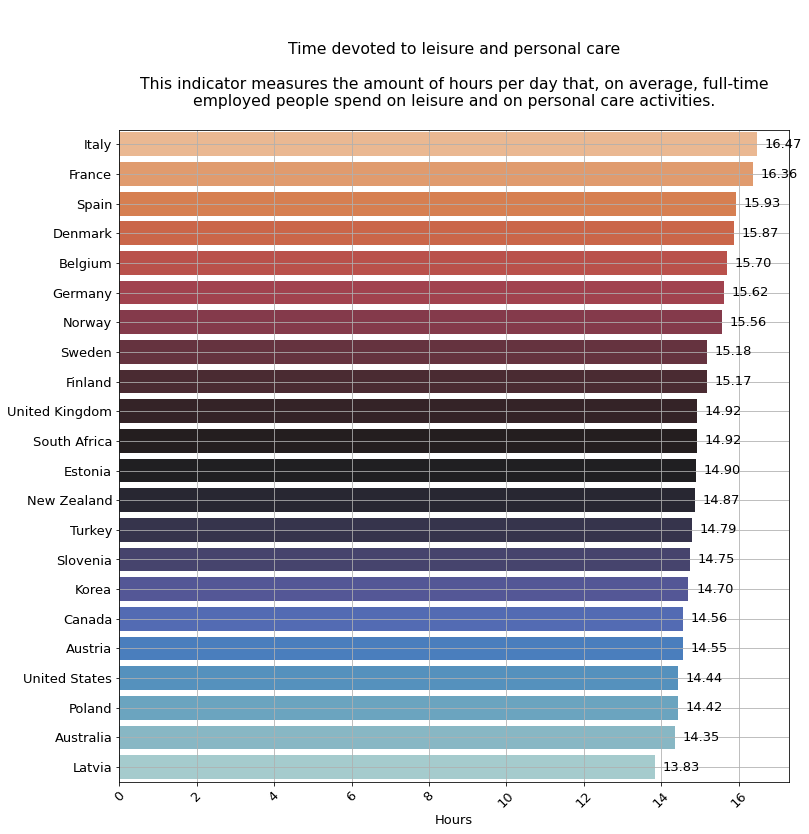

In [10]:
color_palette = ["Spectral", "Wistia_r", "rocket", "magma_r", "viridis", "viridis_r", "YlOrBr_r", "icefire_r"]

plt.rcParams.update({'font.size': 13})
for x in range(len(final_list)):
    plt.figure(figsize=(12, 12))
    splot=sns.barplot(x=final_list[x][2].Value, y=final_list[x][2].Country, palette=random.choice(color_palette))
    for p in splot.patches:        
        width = p.get_width()
        splot.text(width + 0.2, 
                   p.get_y() + p.get_height() / 2,
                   '{:1.2f}'.format(width),
                   ha = 'left',   
                   va = 'center')

    splot.set(ylabel=None)
    splot.set(xlabel=final_list[x][1])
    plt.xticks(rotation=45)
    plt.title(f"\n\n{final_list[x][0]}\n\n{textwrap.fill(final_list[x][3], 80)}\n")
    plt.grid()